In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df['customerID'].duplicated().sum()

np.int64(0)

Convert 0 and 1 values of senior citizen  to yes/no to make it easier too understand 

In [13]:
def conv(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)        

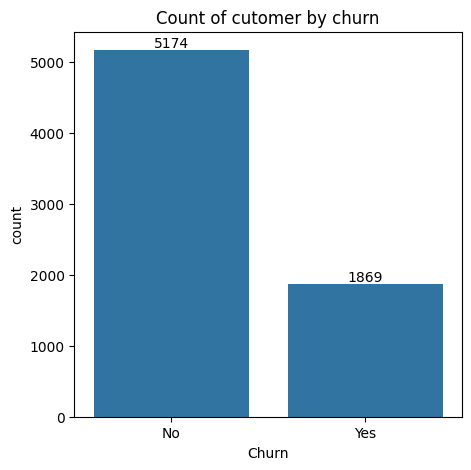

In [32]:
plt.figure(figsize = (5,5))
axs = sns.countplot(x = 'Churn', data = df)
axs.bar_label(axs.containers[0])
plt.title("Count of cutomer by churn")
plt.show()

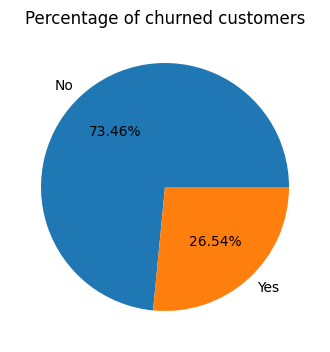

In [33]:
plt.figure(figsize = (4,5))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%')
plt.title("Percentage of churned customers")
plt.show()

From the given pie chart , I can say that 26.54% of customers have churned out 

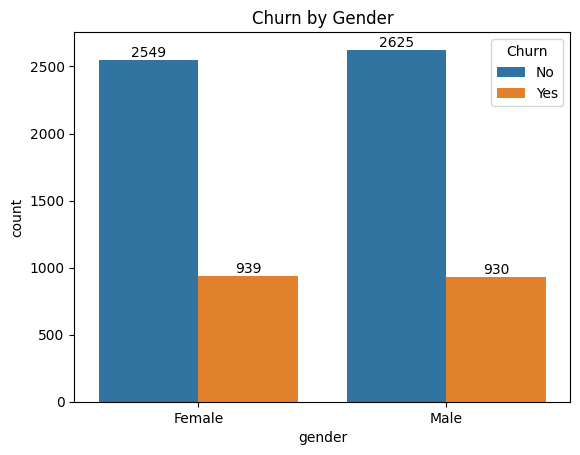

In [41]:
ax = sns.countplot(x = 'gender', data = df, hue = 'Churn')

#for containers in ax.containers: ax.bar_label(containers)
plt.title('Churn by Gender')    
plt.show()   

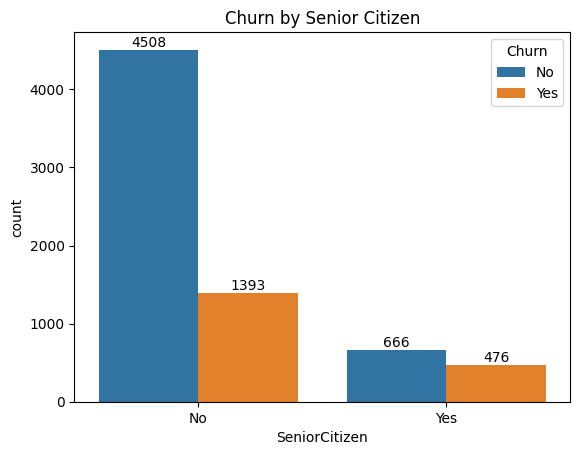

In [47]:
ax = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")

for containers in ax.containers: ax.bar_label(containers)
plt.title("Churn by Senior Citizen")
plt.show()

<Figure size 400x500 with 0 Axes>

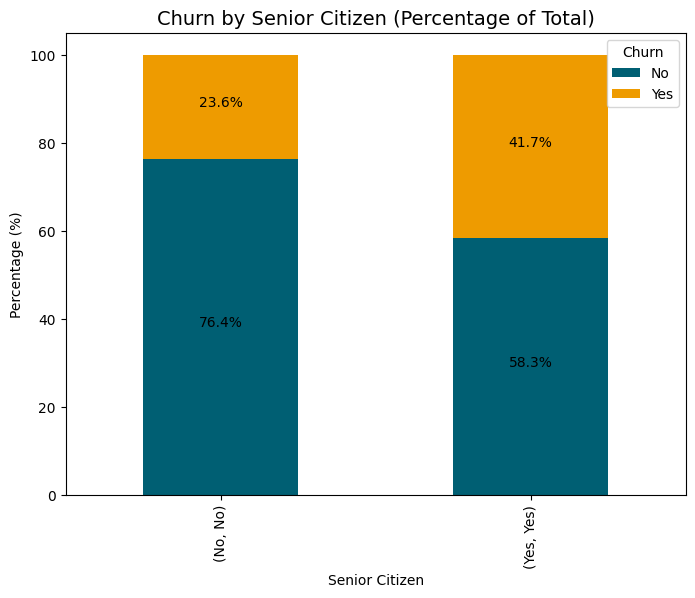

In [54]:

plt.figure(figsize= (4,5))
# Group the data
percentages = (
    df.groupby(['SeniorCitizen', 'Churn'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
)

# Unstack the percentages 
percentages_table = percentages.unstack()

# Create bar chart
ax = percentages_table.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color=['#005f73', '#ee9b00']
)

# Add percentage labels 
for i, bars in enumerate(percentages_table.values):
    bottom = 0
    for j, value in enumerate(bars):
        ax.text(
            i, bottom + value / 2, f'{value:.1f}%',
            ha='center', fontsize=10, color='black'
        )
        bottom += value

# Add title and axes labels
plt.title('Churn by Senior Citizen (Percentage of Total)', fontsize=14)
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.legend(title='Churn', loc='upper right')
plt.show()


Comparative a greater parcentage of people in senior citizen category have churned

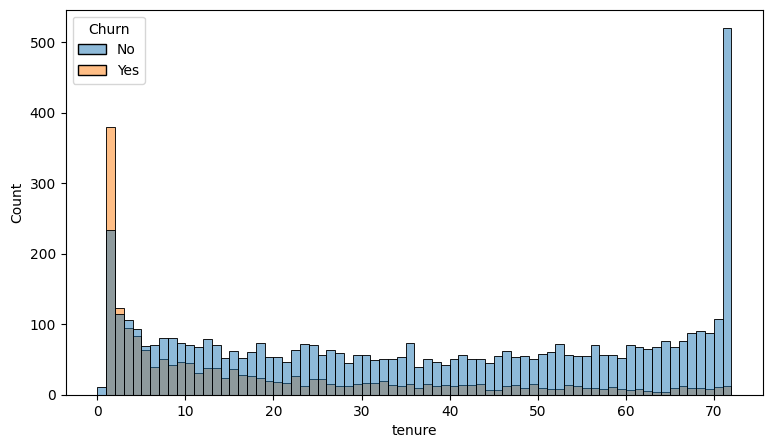

In [58]:
plt.figure(figsize = (9,5))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

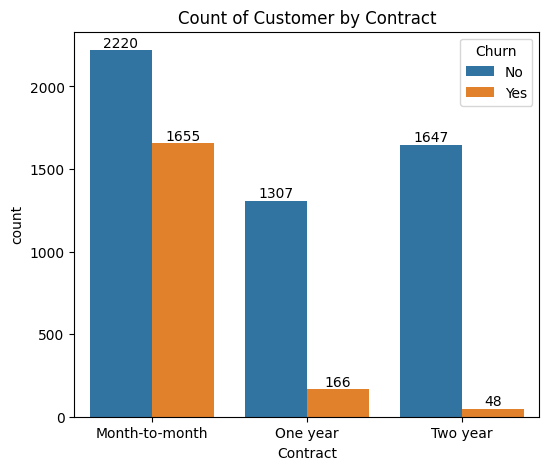

In [65]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
for containers in ax.containers: ax.bar_label(containers)
plt.title("Count of Customer by Contract")
plt.show()

In [ ]:
Peopole who have month-to-month contract are likely to churnn fromm the those who have 1 or 2 years or contract...

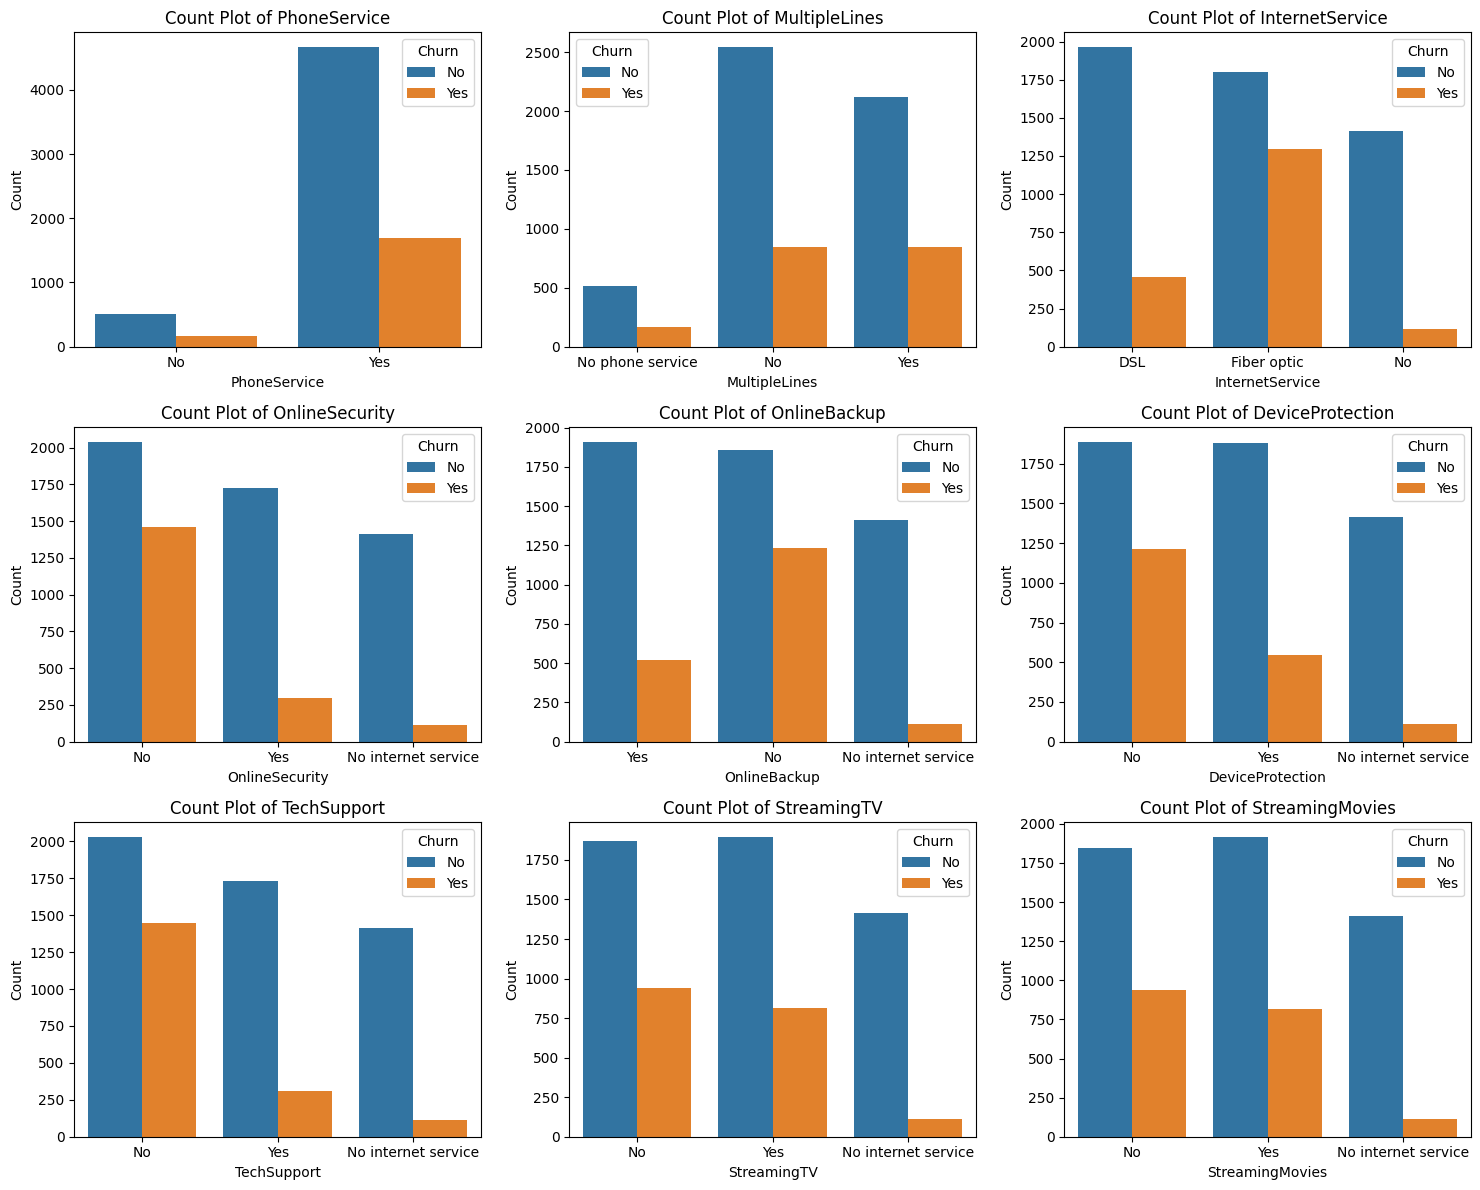

In [82]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The majority of customers who do not churn tend to have services like PhoneService, InternetService, and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

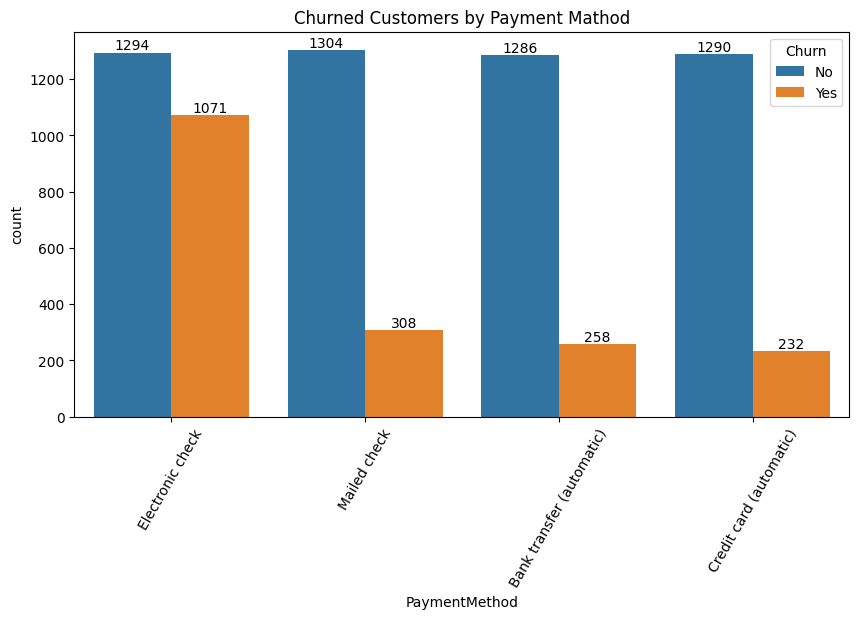

In [87]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
for containers in ax.containers: ax.bar_label(containers)
plt.title("Churned Customers by Payment Mathod")
plt.xticks(rotation = 60)
plt.show()